## Suplementary Figure 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

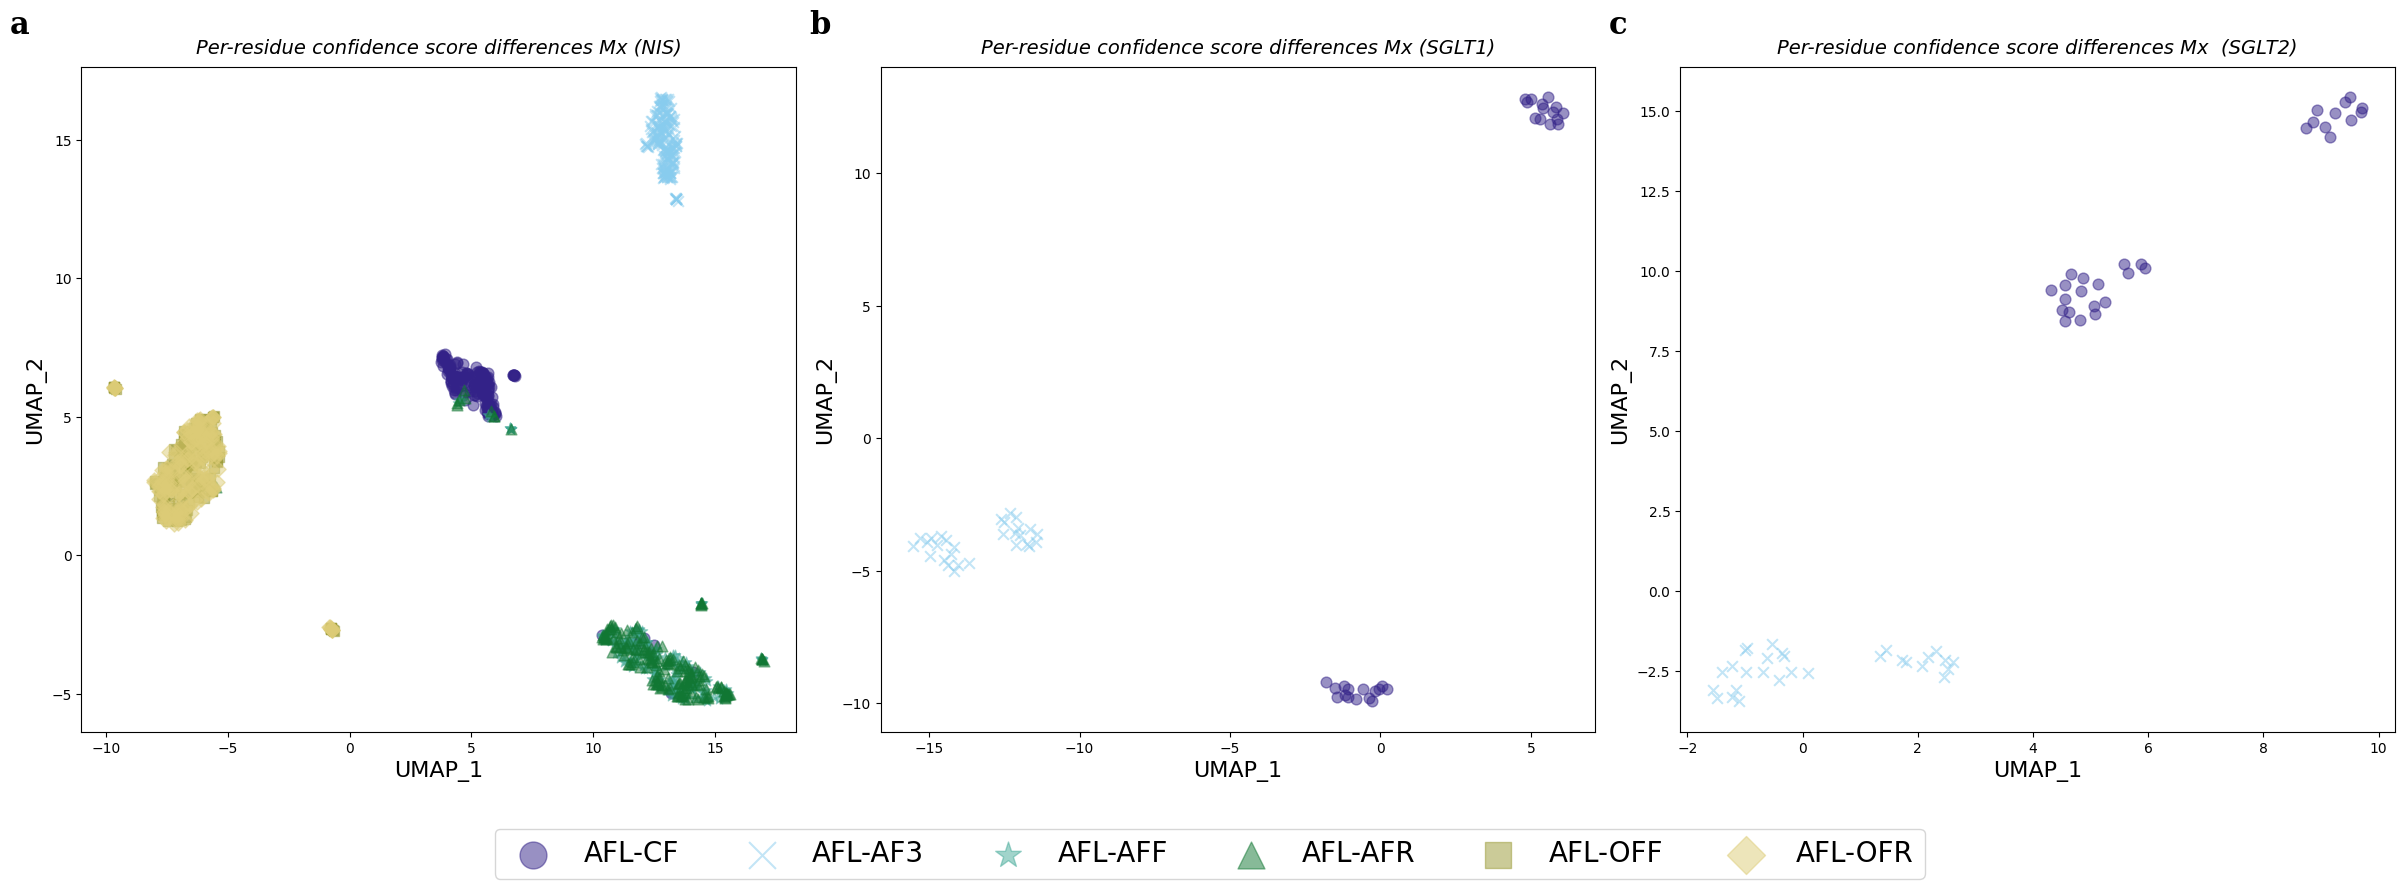

In [ ]:
# Supplementary Figure 1 | UMAP Projection Script
# --------------------------------------------
# This script computes and visualizes 2D UMAP projections from residue-level
# confidence difference matrices (Mx) for three datasets: NIS, SGLT1, and SGLT2.
# Each point corresponds to a prediction from a different protein model and method.
# The goal is to highlight clustering patterns among algorithms using reduced or full MSAs.
# --------------------------------------------

import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ----------------------------------------
# Mount Google Drive (for Google Colab)
# ----------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# ----------------------------------------
# Load and preprocess Mx matrices (CSV only)
# ----------------------------------------

# NIS Matrix
nis_path = '/content/drive/MyDrive/AF_OF/NIS/8.Matrix_M_NIS_AFL.csv'
df_NIS = pd.read_csv(nis_path)

# Clean extra whitespace and reset index
df_NIS['Algorithm'] = df_NIS['Algorithm'].str.strip()
df_NIS = df_NIS.reset_index(drop=True)

# SGLT1 Matrix
sglt1_path = '/content/drive/MyDrive/AF_OF/SGLT1/8.Matrix_M_SGLT1.csv'
df_SGLT1 = pd.read_csv(sglt1_path)

# SGLT2 Matrix
sglt2_path = '/content/drive/MyDrive/AF_OF/SGLT2/8.Matrix_M_SGLT2.csv'
df_SGLT2 = pd.read_csv(sglt2_path)
df_SGLT2.drop(columns=['UMAP_mapped'], inplace=True)

# ----------------------------------------
# Generic UMAP projection function
# ----------------------------------------
def compute_umap(df, drop_cols, algo_map=None):
    """
    Remove metadata, scale data, and compute 2D UMAP projection.
    """
    if algo_map:
        df["Algorithm"] = df["Algorithm"].replace(algo_map)

    # Drop metadata and scale
    numeric_data = df.drop(columns=drop_cols)
    scaled = StandardScaler().fit_transform(numeric_data)
    scaled_df = pd.DataFrame(scaled).fillna(pd.DataFrame(scaled).mean())

    # Compute UMAP
    embedding = umap.UMAP(n_components=2, random_state=42).fit_transform(scaled_df)
    return embedding, df

# ----------------------------------------
# Apply UMAP to each dataset
# ----------------------------------------

# Columns to drop for each dataset
drop_nis    = ["Type", "Algorithm", "NIS_Variant"]
drop_sgltx  = ["Variant", "Algorithm"]

# Algorithm label mappings
map_nis = {
    "AFL-CF": "AFL-CF", "AFL-AF3": "AFL-AF3", "AFL-AFR": "AFL-AFR",
    "AFL-AFF": "AFL-AFF", "AFL-OFF": "AFL-OFF", "AFL-OFR": "AFL-OFR"
}
map_sglt1 = {
    "AFL-CF (SLGT1)": "AFL-CF",
    "AFL-AF3 (SLGT1)": "AFL-AF3"
}
map_sglt2 = {
    "AFL-CF": "AFL-CF",
    "AFL-AF3": "AFL-AF3"
}

# Run UMAP
umap_nis, df_NIS = compute_umap(df_NIS, drop_nis, map_nis)
umap_sglt1, df_SGLT1 = compute_umap(df_SGLT1, drop_sgltx, map_sglt1)
umap_sglt2, df_SGLT2 = compute_umap(df_SGLT2, drop_sgltx, map_sglt2)

# ----------------------------------------
# Assign unified algorithm labels for plotting
# ----------------------------------------
algo_map = {
    "AFL-CF": "AFL-CF",
    "AFL-AF3": "AFL-AF3",
    "AFL-AFF": "AFL-AFF",
    "AFL-AFR": "AFL-AFR",
    "AFL-OFF": "AFL-OFF",
    "AFL-OFR": "AFL-OFR"
}

df_NIS["Mapped"] = df_NIS["Algorithm"].map(algo_map)
df_SGLT1["Mapped"] = df_SGLT1["Algorithm"].map(algo_map)
df_SGLT2["Mapped"] = df_SGLT2["Algorithm"].map(algo_map)

# ----------------------------------------
# UMAP Visualization (3 Subplots)
# ----------------------------------------

# Define marker and color style
markers = ['o', 'x', '*', '^', 's', 'D', 'P']
colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677"]
size = 60

# Create subplots for NIS, SGLT1, and SGLT2
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# ---------- Subplot a: NIS ----------
ax = axes[0]
for name, color, marker in zip(algo_map.values(), colors, markers):
    idx = df_NIS[df_NIS["Mapped"] == name].index
    if len(idx) > 0:
        ax.scatter(umap_nis[idx, 0], umap_nis[idx, 1], color=color, marker=marker,
                   s=size, alpha=0.5, label=name)
ax.set_xlabel("UMAP_1", fontsize=16)
ax.set_ylabel("UMAP_2", fontsize=16)
ax.text(-0.1, 1.05, 'a', transform=ax.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax.text(0.5, 1.02, 'Per-residue confidence score differences Mx (NIS)', transform=ax.transAxes,
        ha='center', fontsize=14, fontstyle='italic')

# ---------- Subplot b: SGLT1 ----------
ax = axes[1]
for name, color, marker in zip(algo_map.values(), colors, markers):
    idx = df_SGLT1[df_SGLT1["Mapped"] == name].index
    if len(idx) > 0:
        ax.scatter(umap_sglt1[idx, 0], umap_sglt1[idx, 1], color=color, marker=marker,
                   s=size, alpha=0.5, label=name)
ax.set_xlabel("UMAP_1", fontsize=16)
ax.set_ylabel("UMAP_2", fontsize=16)
ax.text(-0.1, 1.05, 'b', transform=ax.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax.text(0.5, 1.02, 'Per-residue confidence score differences Mx (SGLT1)', transform=ax.transAxes,
        ha='center', fontsize=14, fontstyle='italic')

# ---------- Subplot c: SGLT2 ----------
ax = axes[2]
for name, color, marker in zip(algo_map.values(), colors, markers):
    idx = df_SGLT2[df_SGLT2["Mapped"] == name].index
    if len(idx) > 0:
        ax.scatter(umap_sglt2[idx, 0], umap_sglt2[idx, 1], color=color, marker=marker,
                   s=size, alpha=0.5, label=name)
ax.set_xlabel("UMAP_1", fontsize=16)
ax.set_ylabel("UMAP_2", fontsize=16)
ax.text(-0.1, 1.05, 'c', transform=ax.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax.text(0.5, 1.02, 'Per-residue confidence score differences Mx  (SGLT2)', transform=ax.transAxes,
        ha='center', fontsize=14, fontstyle='italic')

# Shared legend below all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12),
           ncol=7, frameon=True, prop={'size': 20}, scatterpoints=1, markerscale=2.5)

plt.tight_layout()
plt.show()


## Suplementary Figure 2

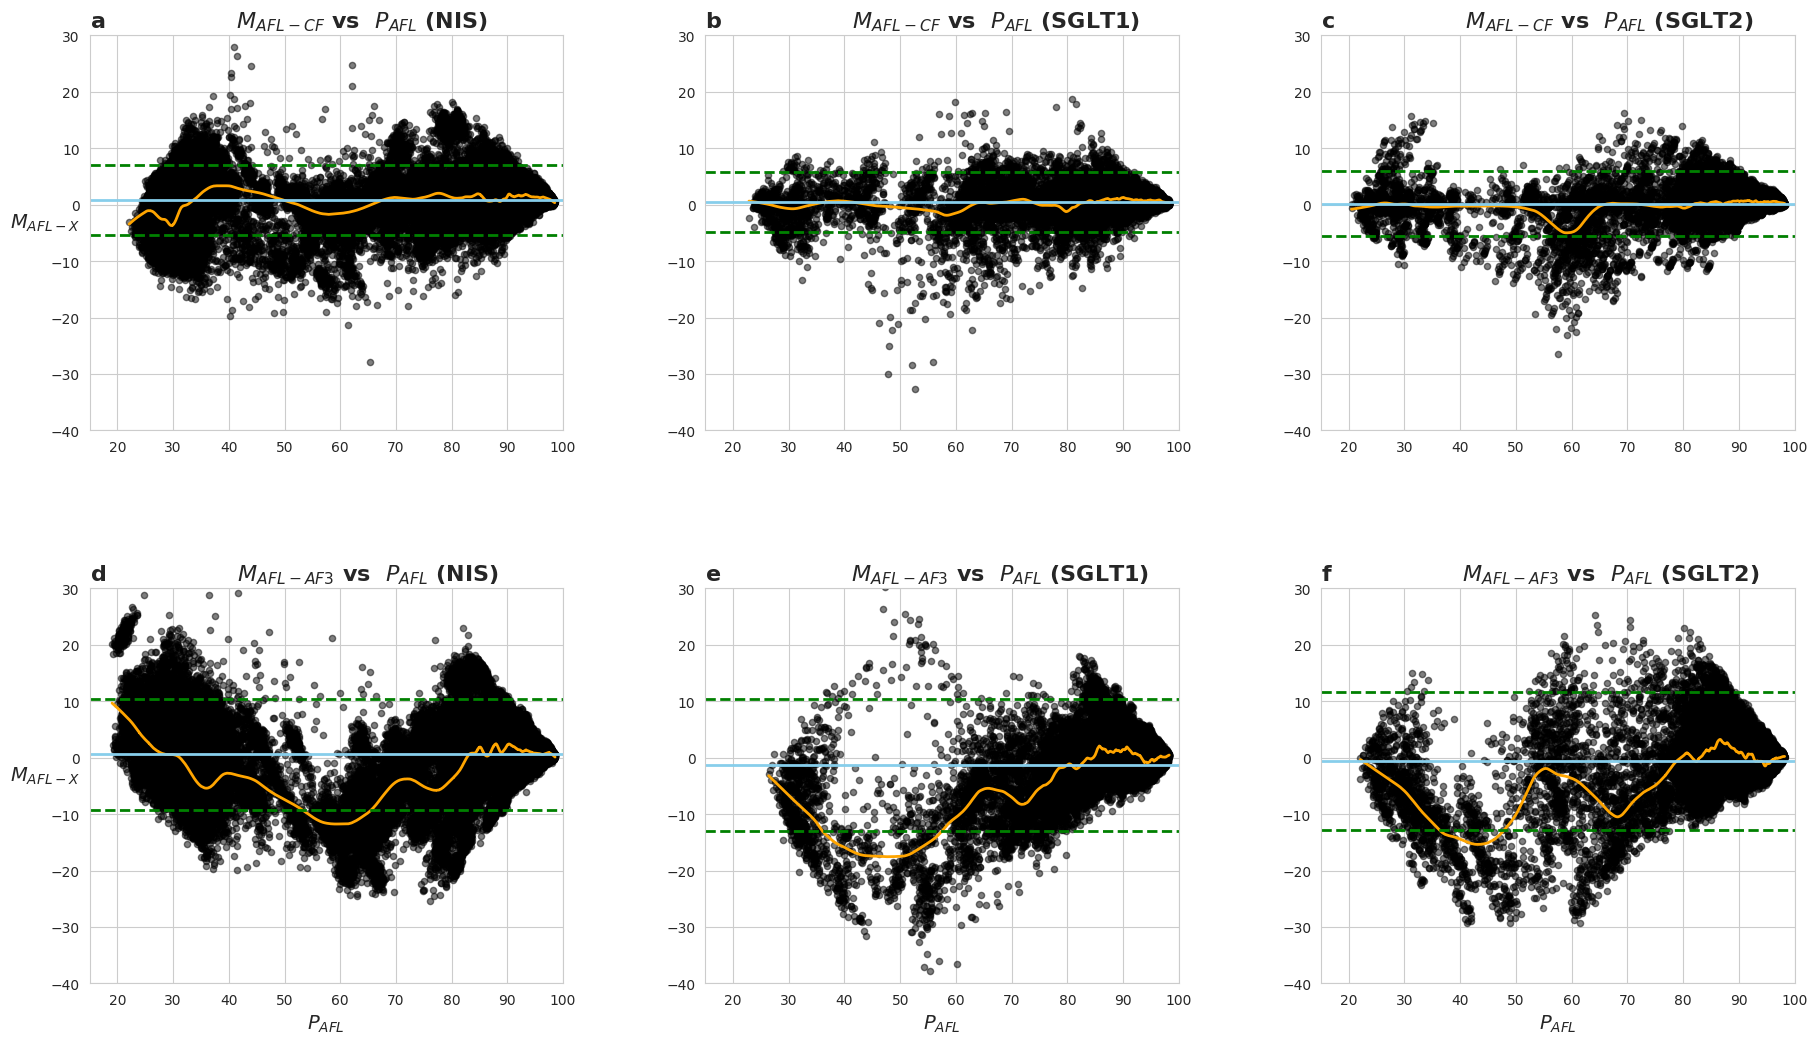

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

sns.set_style("whitegrid")

# ----- CONSTANTES DE PLOT -----
y_min, y_max = -40, 30
x_min, x_max = 15, 100

# ----- FUNCIÓN BLAND-ALTMAN -----
def bland_altman_subplot(ax, x_ref, y, xlabel, ylabel, label_rotation=90):
    diff = x_ref - y
    mean_diff = np.mean(diff)
    LoA = 1.96 * np.std(diff)
    smoothed = lowess(diff, (x_ref + y) / 2, frac=0.03)

    ax.scatter((x_ref + y) / 2, diff, color='black', alpha=0.5, s=20)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linewidth=2)
    ax.axhline(mean_diff, color='skyblue', linestyle='-', linewidth=2)
    ax.axhline(mean_diff + LoA, color='green', linestyle='--', linewidth=2)
    ax.axhline(mean_diff - LoA, color='green', linestyle='--', linewidth=2)

    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold', rotation=label_rotation)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)

# ----- GENERAR FIGURA -----
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)

# Títulos y datos
plots = [
    ('a                 ${M}_{AFL-CF}$ vs  ${P}_{AFL}$ (NIS)',      pCF,        pAFL),
    ('b                 ${M}_{AFL-CF}$ vs  ${P}_{AFL}$ (SGLT1)',    pCF_SGLT1,  pAFL_SGLT1),
    ('c                 ${M}_{AFL-CF}$ vs  ${P}_{AFL}$ (SGLT2)',    pCF_SGLT2,  pAFL_SGLT2),
    ('d                 ${M}_{AFL-AF3}$ vs  ${P}_{AFL}$ (NIS)',     pAF3,       pAFL),
    ('e                 ${M}_{AFL-AF3}$ vs  ${P}_{AFL}$ (SGLT1)',   pAF3_SGLT1, pAFL_SGLT1),
    ('f                 ${M}_{AFL-AF3}$ vs  ${P}_{AFL}$ (SGLT2)',   pAF3_SGLT2, pAFL_SGLT2),
]

# Generar subplots
for idx, (title, method_data, ref_data) in enumerate(plots):
    ax = axes[idx // 3, idx % 3]

    show_ylabel = idx in [0, 3]
    show_xlabel = idx >= 3

    bland_altman_subplot(
        ax,
        ref_data, method_data,
        xlabel=r'${P}_{AFL}$' if show_xlabel else '',
        ylabel=r'${M}_{AFL-X}$' if show_ylabel else '',
        label_rotation=0
    )

    ax.set_title(title, fontsize=16, fontweight='bold', loc='left')

# ----- GUARDAR Y MOSTRAR -----
plt.savefig("Figure_Sup2.pdf", bbox_inches='tight', dpi=300)
plt.show()


# Suplementary Figure 3

In [ ]:

ruta_csv ='/content/drive/MyDrive/AF_OF/Suplementary_Data/D_Matrix_GLOBAL.csv'
D_Matrix_GLOBAL= pd.read_csv(ruta_csv)
D_AFF_CF_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-CF']
D_AFF_AFL_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-AFL']
D_AFF_AFR_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-AR2']
D_AFF_AFR_GLOBAL['Algorithm']=D_AFF_AFR_GLOBAL['Algorithm'].replace({'AFF-AR2':'AFF-AFR'})
D_AFF_AF3_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-AF3']
D_AFF_OFF_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-OFF']
D_AFF_OFR_GLOBAL=D_Matrix_GLOBAL[D_Matrix_GLOBAL['Algorithm']=='AFF-OFR']

D_AFF_CF_GLOBAL = D_AFF_CF_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_CF_GLOBAL=D_AFF_CF_GLOBAL.values.flatten()
D_AFF_AFL_GLOBAL = D_AFF_AFL_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_AFL_GLOBAL=D_AFF_AFL_GLOBAL.values.flatten()
D_AFF_AFR_GLOBAL = D_AFF_AFR_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_AFR_GLOBAL=D_AFF_AFR_GLOBAL.values.flatten()
D_AFF_AF3_GLOBAL = D_AFF_AF3_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_AF3_GLOBAL=D_AFF_AF3_GLOBAL.values.flatten()
D_AFF_OFF_GLOBAL = D_AFF_OFF_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_OFF_GLOBAL=D_AFF_OFF_GLOBAL.values.flatten()
D_AFF_OFR_GLOBAL = D_AFF_OFR_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFF_OFR_GLOBAL=D_AFF_OFR_GLOBAL.values.flatten()
#Matrix P - NIS
ruta_csv ='/content/drive/MyDrive/AF_OF/NIS/MatrixP_CF.csv'
pCF= pd.read_csv(ruta_csv)
ruta_csv ='/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFL.csv'
pAFL= pd.read_csv(ruta_csv)
ruta_csv ='/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFF.csv'
pAFF = pd.read_csv(ruta_csv)
ruta_csv ='/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFR.csv'
pAFR= pd.read_csv(ruta_csv)
ruta_csv = '/content/drive/MyDrive/AF_OF/NIS/MatrixP_AF3.csv'
pAF3= pd.read_csv(ruta_csv)
ruta_csv ='/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFF.csv'
pOFF = pd.read_csv(ruta_csv)
ruta_csv = '/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFR.csv'
pOFR= pd.read_csv(ruta_csv)

pCF = pCF.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pCF=pCF.values.flatten()

pAFF = pAFF.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pAFF=pAFF.values.flatten()

pAFL = pAFL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pAFL=pAFL.values.flatten()

pAFR = pAFR.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pAFR=pAFR.values.flatten()

pAF3 = pAF3.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pAF3=pAF3.values.flatten()

pOFF = pOFF.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pOFF=pOFF.values.flatten()

pOFR = pOFR.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
pOFR=pOFR.values.flatten()

<ipython-input-40-8f2435ac5a42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_AFF_AFR_GLOBAL['Algorithm']=D_AFF_AFR_GLOBAL['Algorithm'].replace({'AFF-AR2':'AFF-AFR'})


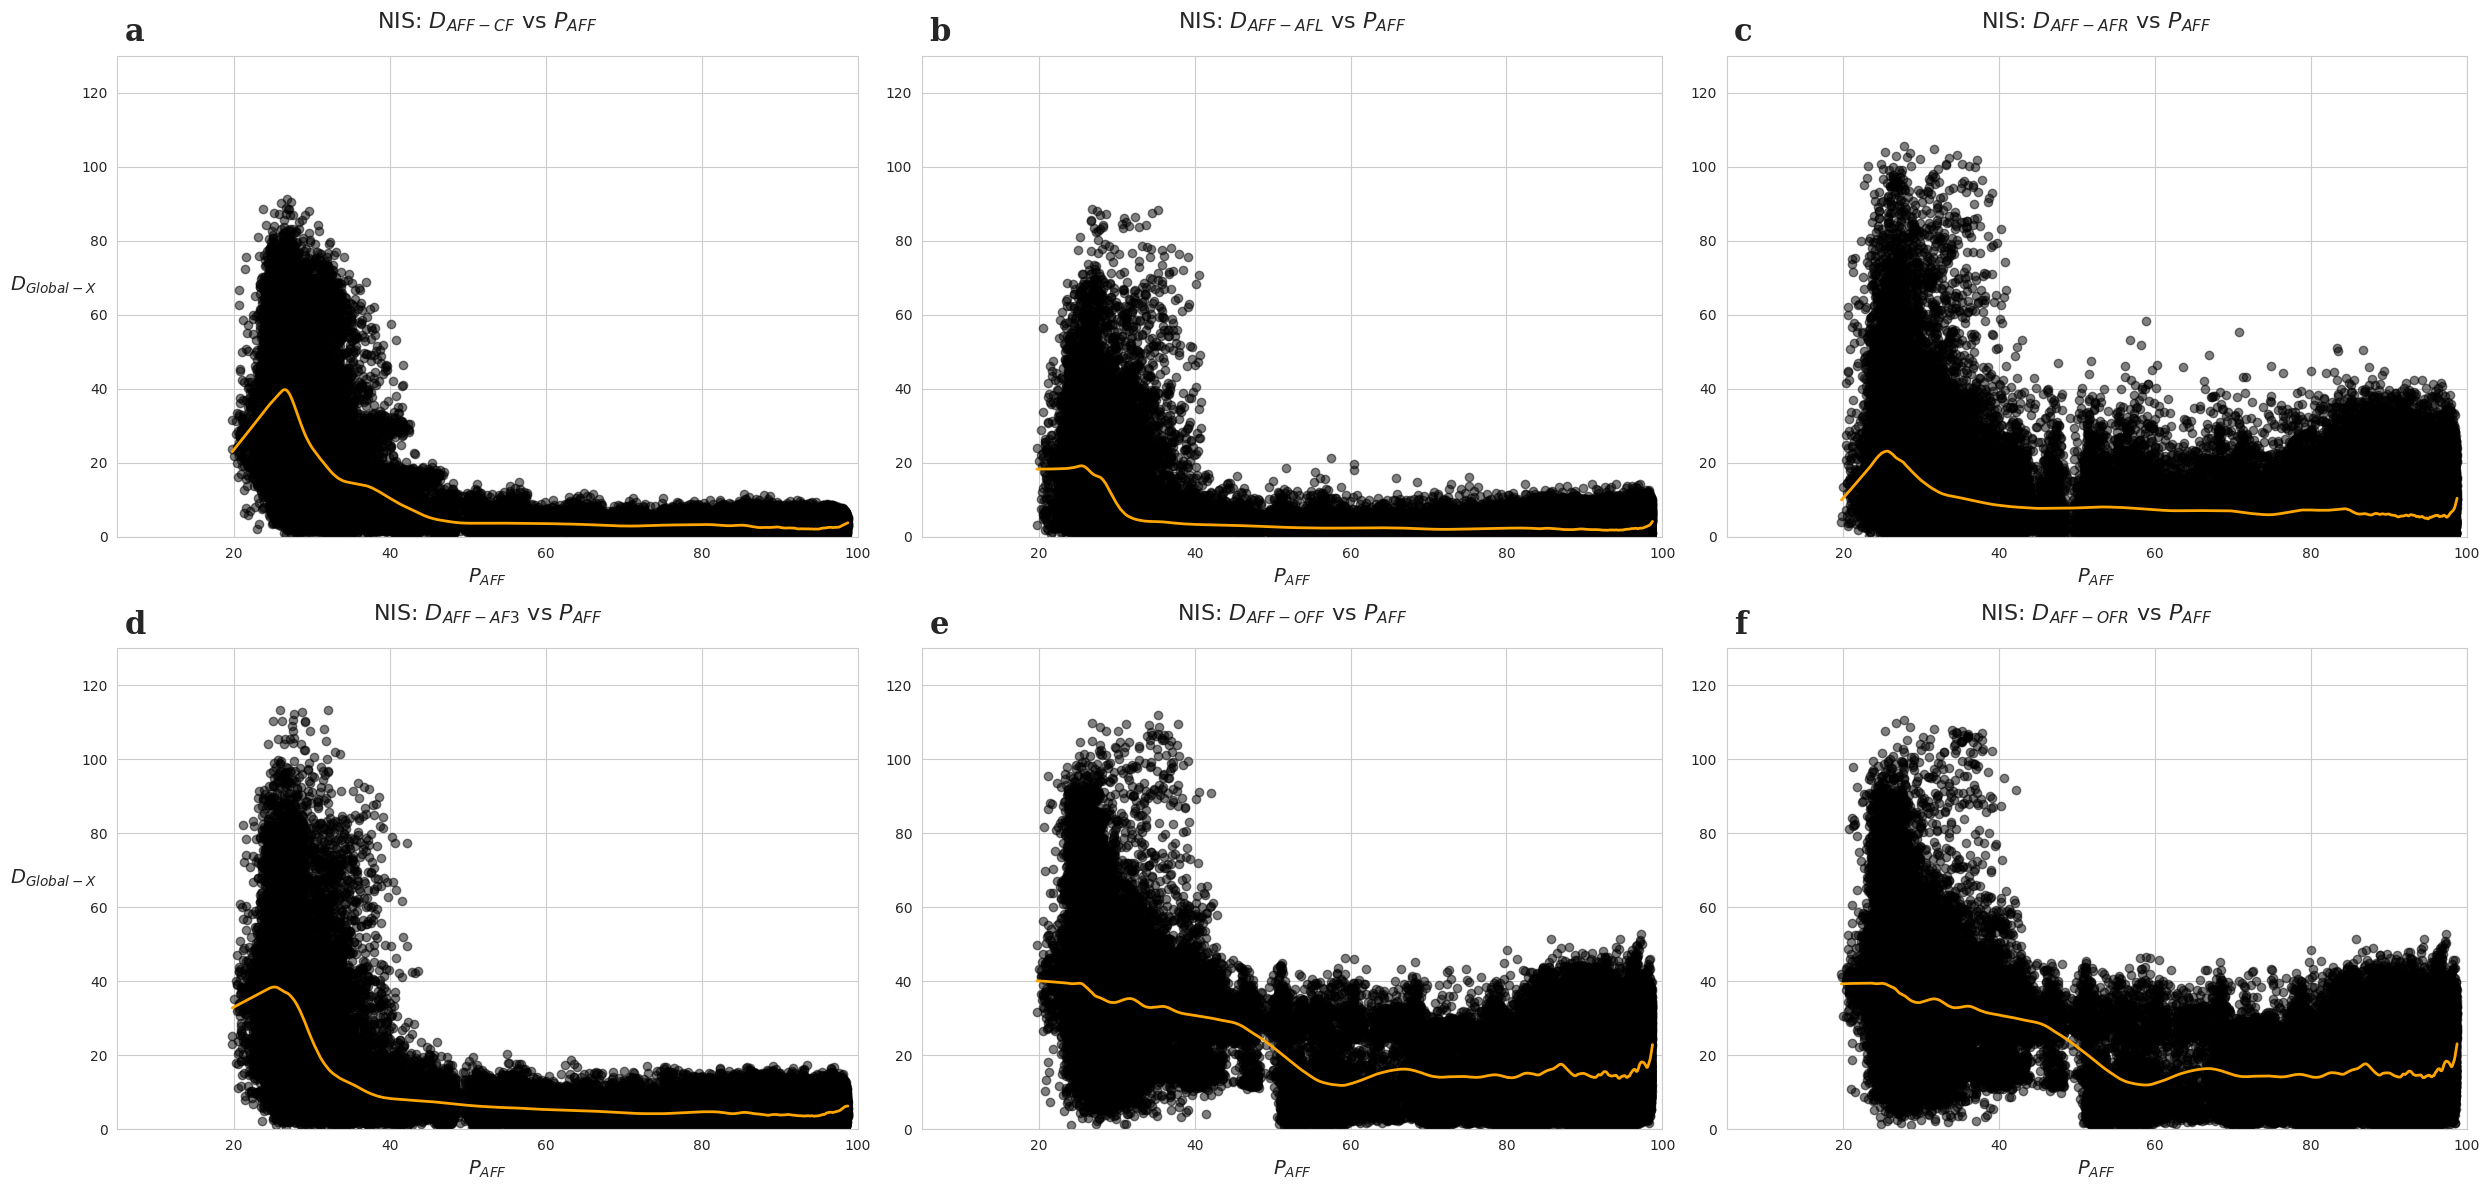

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import pandas as pd

# === Load and process global D-matrix data (distances) ===

# Load the global D-matrix CSV file
d_matrix_path = '/content/drive/MyDrive/AF_OF/Suplementary_Data/D_Matrix_GLOBAL.csv'
d_matrix = pd.read_csv(d_matrix_path)

# Filter data by algorithm
d_cf = d_matrix[d_matrix['Algorithm'] == 'AFF-CF']
d_afl = d_matrix[d_matrix['Algorithm'] == 'AFF-AFL']
d_afr = d_matrix[d_matrix['Algorithm'] == 'AFF-AR2']
d_af3 = d_matrix[d_matrix['Algorithm'] == 'AFF-AF3']
d_off = d_matrix[d_matrix['Algorithm'] == 'AFF-OFF']
d_ofr = d_matrix[d_matrix['Algorithm'] == 'AFF-OFR']

# Rename algorithm for consistency
d_afr['Algorithm'] = d_afr['Algorithm'].replace({'AFF-AR2': 'AFF-AFR'})

# Drop metadata columns and flatten values to 1D arrays
def preprocess_matrix(df):
    return df.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1).values.flatten()

d_cf = preprocess_matrix(d_cf)
d_afl = preprocess_matrix(d_afl)
d_afr = preprocess_matrix(d_afr)
d_af3 = preprocess_matrix(d_af3)
d_off = preprocess_matrix(d_off)
d_ofr = preprocess_matrix(d_ofr)

# === Load and process NIS P-matrix data (per NIS variant) ===

# Define paths for each algorithm's P-matrix CSV file
p_matrix_paths = {
    'CF': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_CF.csv',
    'AFL': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFL.csv',
    'AFF': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFF.csv',
    'AFR': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFR.csv',
    'AF3': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_AF3.csv',
    'OFF': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFF.csv',
    'OFR': '/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFR.csv'
}

# Load, clean, and flatten each matrix
def load_and_flatten_matrix(path):
    df = pd.read_csv(path)
    return df.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1).values.flatten()

# Process all P-matrices
p_cf = load_and_flatten_matrix(p_matrix_paths['CF'])
p_afl = load_and_flatten_matrix(p_matrix_paths['AFL'])
p_aff = load_and_flatten_matrix(p_matrix_paths['AFF'])
p_afr = load_and_flatten_matrix(p_matrix_paths['AFR'])
p_af3 = load_and_flatten_matrix(p_matrix_paths['AF3'])
p_off = load_and_flatten_matrix(p_matrix_paths['OFF'])
p_ofr = load_and_flatten_matrix(p_matrix_paths['OFR'])
# === CONFIGURACIÓN GENERAL ===
y_min, y_max = 0, 130
x_min, x_max = 5, 100

# === FUNCIÓN BLAND-ALTMAN CON FORMATO DE FIGURA 7 ===
def bland_altman_subplot(ax, D, M, panel_letter, title, xlabel, ylabel):
    # Media y límites de acuerdo
    mean_diff = np.mean(D)
    LoA = 1.96 * np.std(D)

    # LOESS
    smoothed = lowess(M, D, frac=0.03)

    # Gráfica
    ax.scatter(D, M, color='black', alpha=0.5, label='Diferencias')
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linestyle='-', linewidth=2, label='LOESS')

    # Estilo y ejes
    ax.set_title(title, fontsize=16, fontweight='normal', pad=20)
    ax.text(0.01, 1.08, panel_letter, transform=ax.transAxes, fontsize=22, fontweight='bold',
            va='top', ha='left', fontfamily='serif')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0, labelpad=20)
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.grid(True)

# === FIGURA S3 ===
plt.figure(figsize=(25, 12))

# Subplots
bland_altman_subplot(plt.subplot(2, 3, 1), pAFF, D_AFF_CF_GLOBAL, 'a', r'NIS: ${D}_{AFF-CF}$ vs ${P}_{AFF}$',  r'${P}_{AFF}$', r'${D}_{Global-X}$')
bland_altman_subplot(plt.subplot(2, 3, 2), pAFF, D_AFF_AFL_GLOBAL, 'b', r'NIS: ${D}_{AFF-AFL}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', '')
bland_altman_subplot(plt.subplot(2, 3, 3), pAFF, D_AFF_AFR_GLOBAL, 'c', r'NIS: ${D}_{AFF-AFR}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', '')
bland_altman_subplot(plt.subplot(2, 3, 4), pAFF, D_AFF_AF3_GLOBAL, 'd', r'NIS: ${D}_{AFF-AF3}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', r'${D}_{Global-X}$')
bland_altman_subplot(plt.subplot(2, 3, 5), pAFF, D_AFF_OFF_GLOBAL, 'e', r'NIS: ${D}_{AFF-OFF}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', '')
bland_altman_subplot(plt.subplot(2, 3, 6), pAFF, D_AFF_OFR_GLOBAL, 'f', r'NIS: ${D}_{AFF-OFR}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', '')

plt.tight_layout()
plt.show()


#Suplementary Figure 4

In [ ]:
#NIS
import pandas as pd

# ruta_csv ='C:/Users/Admin/FoldComparative_cf2024/Metrics_DF/MatrixP_CF.csv'
# pCF= pd.read_csv(ruta_csv)
ruta_csv ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_AFL.csv'
pAFL= pd.read_csv(ruta_csv)
pAFL=pAFL.values.flatten()
# ruta_csv = 'C:/Users/Admin/FoldComparative_cf2024/Metrics_DF/MatrixP_AF3.csv'
# pAF3= pd.read_csv(ruta_csv)

#SGLT1
rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_SGLT1.csv'
MatrixP_SGLT1= pd.read_csv(rute)
#pCF_SGLT1 = MatrixP_SGLT1[MatrixP_SGLT1['Algorithm'] == 'CF_SGLT1']
pAFL_SGLT1 = MatrixP_SGLT1[MatrixP_SGLT1['Algorithm'] == 'AFL_SGLT1']
#pAF3_SGLT1 = MatrixP_SGLT1[MatrixP_SGLT1['Algorithm'] == 'AF3_SGLT1']
pAFL_SGLT1 = pAFL_SGLT1.drop(['Variant', 'Algorithm'], axis=1)
pAFL_SGLT1=pAFL_SGLT1.values.flatten()

rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_SGLT2.csv'
MatrixP_SGLT2= pd.read_csv(rute)

#pCF_SGLT2 = MatrixP_SGLT2[MatrixP_SGLT2['Algorithm'] == 'CF_SGLT2']
pAFL_SGLT2  = MatrixP_SGLT2[MatrixP_SGLT2['Algorithm'] == 'AFL_SGLT2']
pAFL_SGLT2 = pAFL_SGLT2.drop(['Variant', 'Algorithm'], axis=1)
pAFL_SGLT2=pAFL_SGLT2.values.flatten()
#pAF3_SGLT2  = MatrixP_SGLT2[MatrixP_SGLT2['Algorithm'] == 'AF3_SGLT2']
#NIS
# pCF = pCF.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
# pCF=pCF.values.flatten()
# pAF3 = pAF3.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
# pAF3=pAF3.values.flatten()

#SGLT1
# pCF_SGLT1 = pCF_SGLT1.drop(['Variant', 'Algorithm'], axis=1)
# pCF_SGLT1=pCF_SGLT1.values.flatten()
# pAF3_SGLT1 = pAF3_SGLT1.drop(['Variant', 'Algorithm'], axis=1)
# pAF3_SGLT1=pAF3_SGLT1.values.flatten()

#SLGT2
# pCF_SGLT2 = pCF_SGLT2.drop(['Variant', 'Algorithm'], axis=1)
# pCF_SGLT2=pCF_SGLT2.values.flatten()
# pAF3_SGLT2 = pAF3_SGLT2.drop(['Variant', 'Algorithm'], axis=1)
# pAF3_SGLT2=pAF3_SGLT2.values.flatten()
#NIS
rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_AFL_CF_NIS.csv'
D_AFL_CF_NIS_GLOBAL= pd.read_csv(rute)
rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_AFL_AF3_NIS.csv'
D_AFL_AF3_NIS_GLOBAL= pd.read_csv(rute)
#SGLT1
rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_Matrix_SGLT1_GLOBAL.csv'
D_Matrix_SGLT1_GLOBAL= pd.read_csv(rute)
D_AFL_CF_SGLT1=D_Matrix_SGLT1_GLOBAL[D_Matrix_SGLT1_GLOBAL['Algorithm']=='AFL-CF (SLGT1)'] #JAJA SGLT ERA
D_AFL_AF3_SGLT1=D_Matrix_SGLT1_GLOBAL[D_Matrix_SGLT1_GLOBAL['Algorithm']=='AFL-AF3 (SLGT1)']

#SGLT2
rute ='/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_Matrix_SGLT2_GLOBAL.csv'
D_Matrix_SGLT2_GLOBAL= pd.read_csv(rute)
D_AFL_CF_SGLT2=D_Matrix_SGLT2_GLOBAL[D_Matrix_SGLT2_GLOBAL['Algorithm']=='AFL-CF (SGLT2)']
D_AFL_AF3_SGLT2=D_Matrix_SGLT2_GLOBAL[D_Matrix_SGLT2_GLOBAL['Algorithm']=='AFL-AF3 (SGLT2)']

D_AFL_CF_NIS_GLOBAL = D_AFL_CF_NIS_GLOBAL.drop(['Unnamed: 0','NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFL_CF_NIS_GLOBAL=D_AFL_CF_NIS_GLOBAL.values.flatten()
D_AFL_AF3_NIS_GLOBAL = D_AFL_AF3_NIS_GLOBAL.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1)
D_AFL_AF3_NIS_GLOBAL=D_AFL_AF3_NIS_GLOBAL.values.flatten()

D_AFL_CF_SGLT1 = D_AFL_CF_SGLT1.drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1)
D_AFL_CF_SGLT1=D_AFL_CF_SGLT1.values.flatten()
D_AFL_AF3_SGLT1 = D_AFL_AF3_SGLT1.drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1)
D_AFL_AF3_SGLT1=D_AFL_AF3_SGLT1.values.flatten()

D_AFL_CF_SGLT2 = D_AFL_CF_SGLT2.drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1)
D_AFL_CF_SGLT2=D_AFL_CF_SGLT2.values.flatten()
D_AFL_AF3_SGLT2 = D_AFL_AF3_SGLT2.drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1)
D_AFL_AF3_SGLT2=D_AFL_AF3_SGLT2.values.flatten()
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess


# Definir los límites para los ejes Y
y_min, y_max = 0, 125  # Ajusta según tus datos
x_min, x_max = 5, 100

# Definir los datos y calcular las características del gráfico de Bland-Altman con LOESS
def bland_altman_subplot(ax, D, M, title, xlabel, ylabel):
    # Cálculo de la media de las diferencias y los límites de acuerdo
    mean_diff = np.mean(D)
    LoA = 1.96 * np.std(D)

    # Calcular LOESS
    smoothed = lowess(M, D, frac=0.03)

    ax.scatter(D, M, color='black', alpha=0.5, label='Diferencias')
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linestyle='-', linewidth=2, label='LOESS')

    ax.set_title(title, fontsize=16, fontweight='bold')  # Título en negrita y tamaño aumentado
    ax.set_xlabel(xlabel, fontsize=14)  # Etiqueta del eje X en tamaño aumentado
    ax.set_ylabel(ylabel, fontsize=14)  # Etiqueta del eje Y en tamaño aumentado
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    plt.grid(True)

# Graficar cada subplot con el estilo de Bland-Altman y LOESS
plt.figure(figsize=(25, 12))

# Gráfico AF-CF
ax1 = plt.subplot(2, 3, 1)
bland_altman_subplot(ax1, pAFL, D_AFL_CF_NIS_GLOBAL, 'NIS: D(AFL-CF) vs P (AFL)', 'P (AFL)', 'D_GLOBAL (AFL-CF)') # mismo formATO LATEX QUE FIG 6 CON SUPRA INDICE

# Gráfico AF-A30
ax2 = plt.subplot(2, 3, 4)
bland_altman_subplot(ax2, pAFL, D_AFL_AF3_NIS_GLOBAL, 'NIS: D(AFL-AF3)', 'P (AFL)', '') # TODOS ESTOS ANALOGO A GIF 6

# Gráfico AF-AR
ax3 = plt.subplot(2, 3, 2)
bland_altman_subplot(ax3, pAFL_SGLT1, D_AFL_CF_SGLT1, 'SGLT1: AFL-CF', 'P (AFL)', '')

# Gráfico AF-AF3
ax4 = plt.subplot(2, 3, 5)
bland_altman_subplot(ax4, pAFL_SGLT1, D_AFL_AF3_SGLT1, 'SGLT1: AFL-AF3', 'P (AFL)', 'D_GLOBAL (AFL-AF3)')

# Gráfico AF-OF
ax5 = plt.subplot(2, 3, 3)
bland_altman_subplot(ax5, pAFL_SGLT2, D_AFL_AF3_SGLT2, 'SGLT2: AFL-CF', 'P (AFL)', '')

# Gráfico AF-OR
ax6 = plt.subplot(2, 3, 6)
bland_altman_subplot(ax6, pAFL_SGLT2, D_AFL_AF3_SGLT2, 'SGLT2: AFL-AF3', 'P (AFL)', '')

plt.tight_layout()
plt.show()

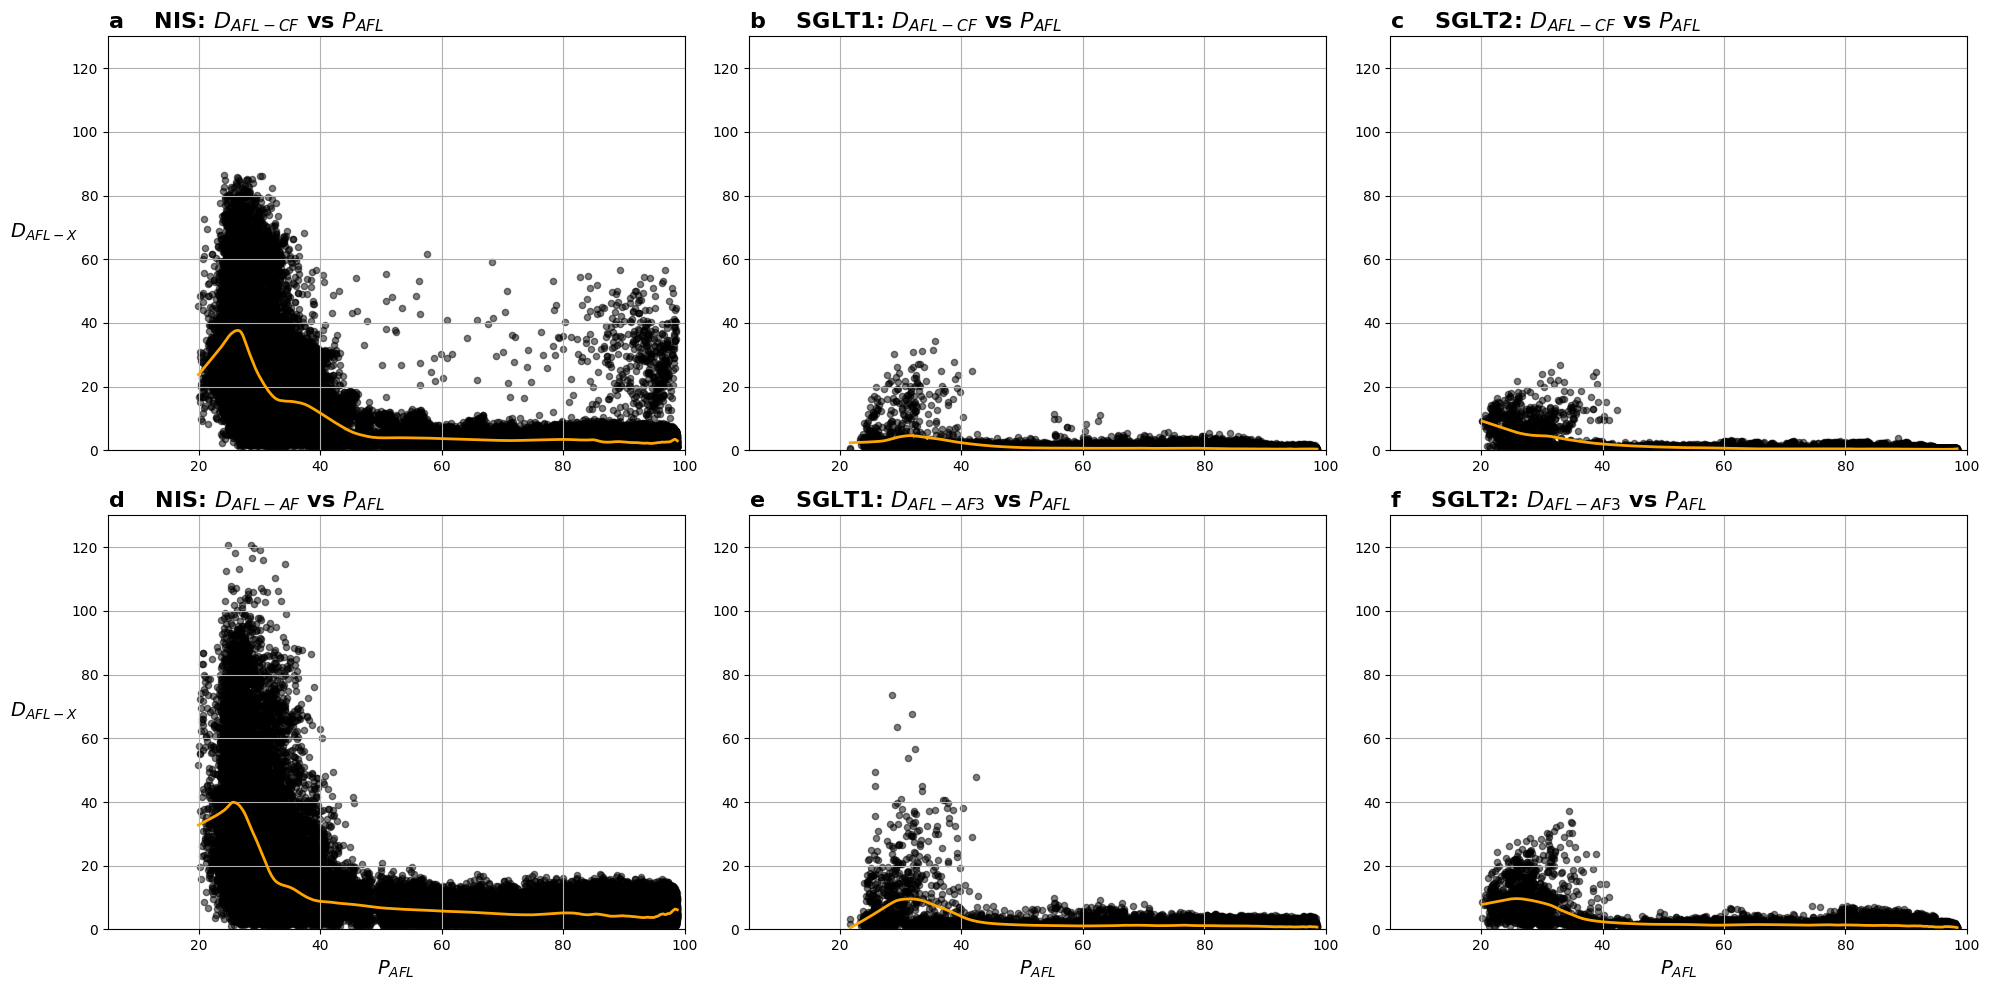

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Function for Bland-Altman subplots
def bland_altman_subplot(ax, D, M, title, show_xlabel=False, show_ylabel=False, label_letter=''):
    """
    Draw a Bland-Altman subplot with LOWESS smoothing.

    Parameters:
    - ax: subplot axis
    - D: X-axis data (reference metric)
    - M: Y-axis data (difference between models)
    - title: Title of the subplot
    - show_xlabel: Whether to display x-axis label
    - show_ylabel: Whether to display y-axis label
    - label_letter: subplot letter (e.g. 'a', 'b', ...)
    """
    smoothed = lowess(M, D, frac=0.03)

    ax.scatter(D, M, color='black', alpha=0.5, s=20)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linewidth=2)

    if show_xlabel:
        ax.set_xlabel('${P}_{AFL}$', fontsize=14, fontweight='bold')
    if show_ylabel:
        ax.set_ylabel('${D}_{AFL-X}$', fontsize=14, fontweight='bold', rotation=0, labelpad=20)

    ax.set_title(f"{label_letter} {title}", fontsize=16, fontweight='bold', loc='left')
    ax.set_xlim(5, 100)
    ax.set_ylim(0, 130)
    ax.grid(True)

# -----------------------------
# Load reference matrices (pAFL)
# -----------------------------
pAFL = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_AFL.csv')
pAFL = pAFL.drop(['NIS_Variant','Type', 'Algorithm'], axis=1)
pAFL = pAFL.values.flatten()

# SGLT1 and SGLT2: Load AFL predictions
pAFL_SGLT1 = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_SGLT1.csv')
pAFL_SGLT1 = pAFL_SGLT1[pAFL_SGLT1['Algorithm'] == 'AFL_SGLT1']
pAFL_SGLT1 = pAFL_SGLT1.drop(['Variant', 'Algorithm'], axis=1).values.flatten()

pAFL_SGLT2 = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.MatrixP_SGLT2.csv')
pAFL_SGLT2 = pAFL_SGLT2[pAFL_SGLT2['Algorithm'] == 'AFL_SGLT2']
pAFL_SGLT2 = pAFL_SGLT2.drop(['Variant', 'Algorithm'], axis=1).values.flatten()

# -----------------------------
# Load Distance Matrices (D)
# -----------------------------

# NIS comparisons
D_AFL_CF_NIS = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_AFL_CF_NIS.csv')
D_AFL_CF_NIS = D_AFL_CF_NIS.drop(['Unnamed: 0','NIS_Variant', 'Algorithm', 'Type'], axis=1).values.flatten()

D_AFL_AF3_NIS = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_AFL_AF3_NIS.csv')
D_AFL_AF3_NIS = D_AFL_AF3_NIS.drop(['NIS_Variant', 'Algorithm', 'Type'], axis=1).values.flatten()

# SGLT1 comparisons
D_SGLT1 = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_Matrix_SGLT1_GLOBAL.csv')
D_AFL_CF_SGLT1  = D_SGLT1[D_SGLT1['Algorithm'] == 'AFL-CF (SLGT1)'].drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1).values.flatten()
D_AFL_AF3_SGLT1 = D_SGLT1[D_SGLT1['Algorithm'] == 'AFL-AF3 (SLGT1)'].drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1).values.flatten()

# SGLT2 comparisons
D_SGLT2 = pd.read_csv('/content/drive/MyDrive/AF_OF/Suplementary_Data/4.D_Matrix_SGLT2_GLOBAL.csv')
D_AFL_CF_SGLT2  = D_SGLT2[D_SGLT2['Algorithm'] == 'AFL-CF (SGLT2)'].drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1).values.flatten()
D_AFL_AF3_SGLT2 = D_SGLT2[D_SGLT2['Algorithm'] == 'AFL-AF3 (SGLT2)'].drop(['Variant', 'Algorithm','UMAP_mapped'], axis=1).values.flatten()

# -----------------------------
# Create the Supplementary Figure
# -----------------------------
# Subplots in new desired order
titles = [
    "   NIS: ${D}_{AFL-CF}$ vs ${P}_{AFL}$",
    "   SGLT1: ${D}_{AFL-CF}$ vs ${P}_{AFL}$",
    "   SGLT2: ${D}_{AFL-CF}$ vs ${P}_{AFL}$",
    "   NIS: ${D}_{AFL-AF}$ vs ${P}_{AFL}$",
    "   SGLT1: ${D}_{AFL-AF3}$ vs ${P}_{AFL}$",
    "   SGLT2: ${D}_{AFL-AF3}$ vs ${P}_{AFL}$"
]

data_M = [
    D_AFL_CF_NIS,
    D_AFL_CF_SGLT1,
    D_AFL_CF_SGLT2,
    D_AFL_AF3_NIS,
    D_AFL_AF3_SGLT1,
    D_AFL_AF3_SGLT2
]

reference_vectors = [
    pAFL,
    pAFL_SGLT1,
    pAFL_SGLT2,
    pAFL,
    pAFL_SGLT1,
    pAFL_SGLT2
]

letters = ['a', 'b', 'c', 'd', 'e', 'f']

# Create subplots (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for idx, ax in enumerate(axes.flat):
    show_ylabel = idx in [0, 3]
    show_xlabel = idx in [3, 4, 5]

    bland_altman_subplot(
        ax,
        D=reference_vectors[idx],
        M=data_M[idx],
        title=titles[idx],
        show_xlabel=show_xlabel,
        show_ylabel=show_ylabel,
        label_letter=letters[idx]
    )

plt.tight_layout()
plt.show()
